<a href="https://colab.research.google.com/github/praxxyy14/Deep-Learning/blob/main/Text_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Text classification (sentiment analysis) / NLP (Natural lang processing)
TFIDF - Term frequency inverse document frequency.

In [9]:
from warnings import filterwarnings
filterwarnings("ignore")

In [10]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [11]:
import pandas as pd
df = pd.read_csv(url, sep = "\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
df.isna().sum()

,0
Review,0
Liked,0


In [13]:
df.duplicated().sum()

np.int64(4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Step 3 - Text Processing

In [15]:
import re

In [16]:
def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub("[^a-z0-9 ]", "",text)
    return text

In [17]:
preprocess_text("Amazing... The taste was very,good!")

'amazing the taste was verygood'

In [18]:
df["pre"] = df["Review"].apply(preprocess_text)
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


Apply TFIDF Vectorizer on preprocessed text

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(df["pre"]).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:


X_pre.shape

(1000, 2067)

Apply SVD(Singular value decomposition)
Reduces number of columns to required number of colums

(Extract import features out of data)

In [22]:
from sklearn.decomposition import TruncatedSVD

In [23]:
n_components = 300
svd = TruncatedSVD(n_components)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[ 0.11457856,  0.19021732,  0.29860512, ...,  0.05477855,
         0.07376406,  0.01040087],
       [ 0.20041515,  0.06219206,  0.10386266, ..., -0.00919619,
        -0.03452568,  0.01007235],
       [ 0.248602  , -0.05947125, -0.09197256, ..., -0.00843274,
         0.0036789 , -0.06348887],
       ...,
       [ 0.25745938,  0.21354302, -0.2526886 , ...,  0.00909681,
        -0.00906268, -0.01050567],
       [ 0.21755074,  0.04422346, -0.07900023, ...,  0.03267431,
         0.02388722,  0.04907859],
       [ 0.22278543,  0.02689928, -0.02221586, ...,  0.00747689,
         0.00360866,  0.03627305]])

In [24]:

X_pre_red.shape


(1000, 300)


TFIFD -> SVD : LSA (Latent Semantic Analysis)

Train test split

In [25]:

Y = df[["Liked"]]

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre_red, Y, test_size=0.2, random_state=42)

In [27]:
xtrain

array([[ 0.22714971, -0.1355275 , -0.0502005 , ...,  0.0046996 ,
         0.04108752, -0.02157262],
       [ 0.04699212,  0.01342239,  0.03451726, ...,  0.00348526,
         0.00489518,  0.00764215],
       [ 0.19705026, -0.13148614, -0.08873096, ..., -0.02324283,
        -0.01683435, -0.0284963 ],
       ...,
       [ 0.28454308,  0.11308598,  0.31554383, ...,  0.01628134,
        -0.0015616 , -0.03902332],
       [ 0.16594076, -0.07105197, -0.05824828, ..., -0.01394933,
        -0.01084659, -0.03004227],
       [ 0.17456908,  0.04421885,  0.01479548, ..., -0.00859976,
        -0.06232283, -0.00509252]])

In [28]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [29]:
xtest

array([[ 7.69189231e-02,  1.34941591e-01, -7.03830759e-02, ...,
         2.90871401e-05, -4.10609462e-06,  1.16627406e-02],
       [ 2.54266004e-01, -7.50053986e-02, -3.37347165e-02, ...,
         2.82296594e-04,  7.94448076e-03, -3.29878211e-02],
       [ 2.65741145e-01,  1.06919638e-02,  9.62324023e-02, ...,
         3.90243756e-02, -1.13434962e-02, -1.36637798e-02],
       ...,
       [ 1.49168849e-01,  1.66499911e-01,  2.20766312e-01, ...,
        -2.93960674e-03,  1.08424989e-02,  1.00860324e-02],
       [ 1.46406258e-01,  2.12869452e-01, -2.16913283e-01, ...,
        -8.05929327e-03,  5.59247745e-02,  2.67775314e-02],
       [ 3.20891746e-01, -2.48193563e-02,  1.88372807e-02, ...,
        -2.95877313e-02,  2.87579132e-02, -1.35201953e-02]])

In [30]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


In [32]:
xtrain.shape

(800, 300)

In [33]:
xtest.shape

(200, 300)

In [34]:
xtest.shape[1]

300

Build the neural network

1. L1 - Lasso (Penalty applied on absolute value of weights)
2. L2 - Ridge -(Penalty applied on squared value of weights)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras import regularizers

In [37]:

model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [40]:


es = EarlyStopping(patience=10, restore_best_weights=True)

In [41]:

hist = model.fit(
    xtrain, ytrain,
    validation_data = (xtest, ytest),
    batch_size=32,
    epochs=200,
    callbacks = [es]
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5124 - loss: 3.0192 - val_accuracy: 0.5050 - val_loss: 2.1967
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5845 - loss: 1.9941 - val_accuracy: 0.5600 - val_loss: 1.5025
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5637 - loss: 1.3892 - val_accuracy: 0.5600 - val_loss: 1.1170
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6181 - loss: 1.0546 - val_accuracy: 0.6050 - val_loss: 0.9110
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6712 - loss: 0.8759 - val_accuracy: 0.5950 - val_loss: 0.8043
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6761 - loss: 0.7825 - val_accuracy: 0.6000 - val_loss: 0.7495
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7383 - loss: 0.7332 - val_accuracy: 0.7600 - val_loss: 0.7186
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8101 - loss: 0.6978 - val_accuracy: 0.7400 - 

Evaluate model

In [42]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9443 - loss: 0.4057


[0.4097321331501007, 0.949999988079071]

In [43]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8174 - loss: 0.6277 


[0.6081610321998596, 0.8149999976158142]

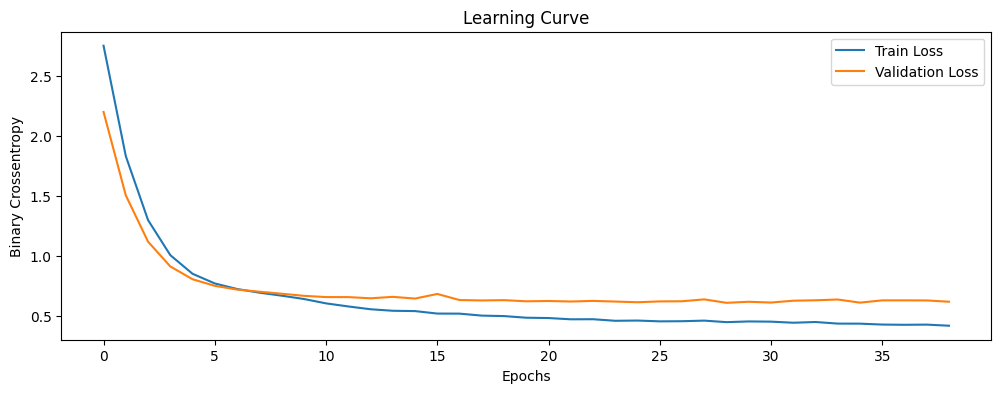

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [45]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.07045625],
       [0.9289669 ],
       [0.0439575 ],
       [0.11962423],
       [0.96566796]], dtype=float32)

In [46]:
ypred_train = [1 if prob >= 0.5 else 0 for prob in yprob_train]
ypred_train[0:5]

[0, 1, 0, 0, 1]

In [47]:


ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


from matplotlib import pyplot as plt
_df_0['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Liked'].plot(kind='line', figsize=(8, 4), title='Liked')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:

yprob_test = model.predict(xtest)
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[1, 1, 1, 1, 1]

In [50]:

ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


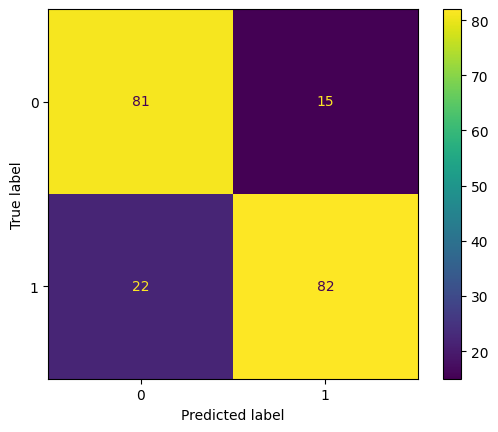

In [51]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [52]:

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        96
           1       0.85      0.79      0.82       104

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200



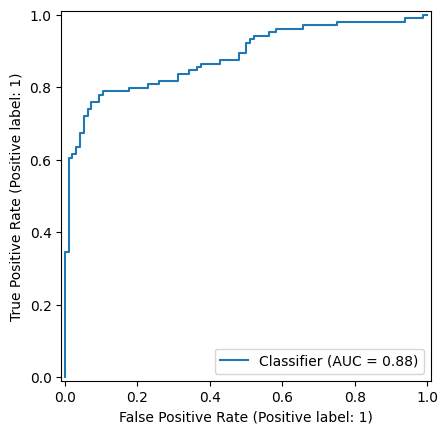

In [53]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)


In [54]:

def predict_sentiment(text: str):
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  prob = model.predict(text_pre_red)
  sentiment = "positive" if prob>=0.5 else "negative"
  return sentiment, prob

In [55]:
predict_sentiment("Amazing Restaurant ... Really liked the taste of Pizza!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


('positive', array([[0.88391894]], dtype=float32))

In [56]:

predict_sentiment("Very Bad Service, I also did not like the ambience...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


('negative', array([[0.06576831]], dtype=float32))

In [57]:

predict_sentiment("Incredible Taste, I enjoyed the starters and main course!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


('positive', array([[0.8366698]], dtype=float32))

In [58]:
tfidf

TfidfVectorizer()

In [59]:
svd

TruncatedSVD(n_components=300)

In [60]:
model

<Sequential name=sequential, built=True>

In [61]:
%pip install joblib

In [62]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")

['tfidf.joblib']

In [63]:
['tfidf.joblib']

['tfidf.joblib']

In [64]:


joblib.dump(svd, "svd.joblib")

['svd.joblib']

['svd.joblib']

In [66]:

model.save("Sentiment.keras")


In [67]:
t = joblib.load("tfidf.joblib")
t

TfidfVectorizer()

In [68]:


s = joblib.load("svd.joblib")

In [69]:
s

TruncatedSVD(n_components=300)

In [70]:
from keras.models import load_model

In [71]:

m = load_model("Sentiment.keras")

In [72]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)